In [71]:
from audioFunctions import *
from binaryFunctions import *
from qam import *
from sequenceGenerators import *
from receiver import *
from error_coding import *
from to_import import *

In [72]:
CE_binary = binaryTextFileToBinary('Data_Files/random_bits.txt')
#binary = fileToBinary('Data_Files/kokoro_text_prt3.txt')
binary = binaryTextFileToBinary('Data_Files/kokoro_bin.txt')

CE_symbols = qpsk(CE_binary)
#symbols_old = qpsk(Hamming74(binary))
#coded_binary = Hamming74(binary)
coded_binary = binaryTextFileToBinary('Data_Files/coded_kokoro_bin.txt')

In [73]:
# Set the parameters for transmission
CP = 704 
N = 4096
guard = 5
CE_repeat = 20

frame_data_length = 180

In [74]:
# Make your instructions
instruction = []
for i in range(2047):
    if i <1500 and i > 100:
        instruction.append(1)
    else: 
        instruction.append(0)

In [75]:
# to comply with standars should find out what how many binary symbols are needed for each OFDM symbol

data_binary_len = len(coded_binary)
rand_binary_len =len(CE_binary)

rand_for_xor = (CE_binary * math.ceil(data_binary_len/rand_binary_len))[0:data_binary_len]

_xormap = {('0', '1'): '1', ('1', '0'): '1', ('1', '1'): '0', ('0', '0'): '0'}
def xor(x, y):
    return ''.join([_xormap[a, b] for a, b in zip(x, y)])

coded_binary = xor(coded_binary, rand_for_xor)

In [280]:
a = '00110011'
b = '0101'
xor(a,b)

'0110'

In [6]:
symbols = varyingModulation_std(coded_binary,instruction, N, CE_binary, 50000)
#symbols = qpsk(coded_binary)

bitcount 2798
additional  1190
data length  5580820
new data len  5582010
symbol number 100 is done.
symbol number 200 is done.
symbol number 300 is done.
symbol number 400 is done.
symbol number 500 is done.
symbol number 600 is done.
symbol number 700 is done.
symbol number 800 is done.
symbol number 900 is done.
symbol number 1000 is done.
symbol number 1100 is done.
symbol number 1200 is done.
symbol number 1300 is done.
symbol number 1400 is done.
symbol number 1500 is done.
symbol number 1600 is done.
symbol number 1700 is done.
symbol number 1800 is done.
symbol number 1900 is done.


In [7]:
# So far this works the best at estimating the location... 
chirp_signal = Chirp(500,20500,1, volume = 100)

In [266]:
# For channel esimation (CE)

# prepare channel esitimation data to be transmitted 
CE_Time, CE_Freq = ofdmSymbols(CE_symbols, CP, N)
print(CE_Time.shape)

print(symbols.shape)
Payload_Time, Payload_Freq = ofdmSymbols(symbols, CP, N)

extra = frame_data_length - len(Payload_Time)%frame_data_length
print(len(Payload_Time), extra)
for i in range(extra):
    Payload_Time = np.concatenate((Payload_Time, [CE_Time[1]]))
    
print(Payload_Time.shape)
num_of_frames = int(len(Payload_Time)/frame_data_length)

print(num_of_frames)

'''num_of_frames = 2
offset = 0
Payload_Time = Payload_Time[offset*frame_data_length:(num_of_frames + offset)*frame_data_length]
'''
#num_of_frames += 1
#Payload_Time = np.concatenate((Payload_Time[:frame_data_length], Payload_Time))

encoded symbols length =  6000
(3, 4800)
(4083765,)
encoded symbols length =  4083765
1995 165
(2160, 4800)
12


'num_of_frames = 2\noffset = 0\nPayload_Time = Payload_Time[offset*frame_data_length:(num_of_frames + offset)*frame_data_length]\n'

In [267]:
# Prepare what to transmit

# Channel estimation at the beginning
CE_transmit = repeat_signal(CE_Time[0], CE_repeat)
known_freq = CE_Freq[0]

# Payload mixed with CE symbols distributed between them
Payload = prepare_payload_std(Payload_Time, CE_transmit, chirp_signal, num_of_frames, frame_data_length)

In [268]:
CE_pad = repeat_signal(CE_Time[0], CE_repeat*10)
#additional = np.concatenate((CE_pad))
additional = CE_pad

In [269]:
x = save_transmit( (Pause(20),) + tuple(Payload) , playOutput=True)
#x = save_transmit( tuple(Payload) , playOutput=True)
print("Transmit signal is ", round(len(x)/fs, 2), " seconds")

playing
[0, 1]
[    0     0     0 ... -8714  5897   935]
Transmit signal is  296.0  seconds


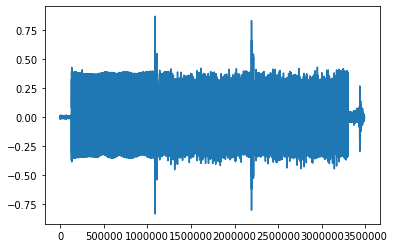

In [236]:
y = audioDataFromFile('Wav_Files/recording_pad6.wav')
y_next = removeChirpAndPause_std(y, chirp_signal, 600000, plot = False, rng = 100)


block_length= N+CP
offset = block_length * (CE_repeat *6) # + frame_data_length)

y_next = y_next[offset:]
#plot_y(y_next)

y = audioDataFromFile('Wav_Files/recording_long_pad.wav')
plot_y(y)

param  [-0.00768075 -0.00835135]
0.008351346633417123
param  [-0.00760701  6.27435925]
6.274359251870322
param  [-0.00762056 -0.00763946]
0.007639463840400042
param  [-0.00766223  6.27393157]
6.273931571072316
param  [-0.00770773  6.27686763]
6.276867630922691
param  [-0.0077003  -0.00877605]
0.008776047381546094
param  [-0.00769365 -6.28961764]
0.0064323362119349525
param  [-0.00766914 -0.00923445]
0.00923445137157124
param  [-0.00762865 -0.00990718]
0.009907182044887722
param  [-0.00761047 -6.29107938]
0.007894069379013935
param  [-0.00763214 -6.29086317]
0.007677859902707418
param  [-0.00762075 -0.00694002]
0.0069400249376563765


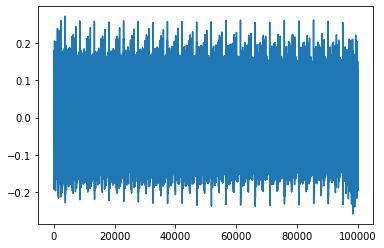

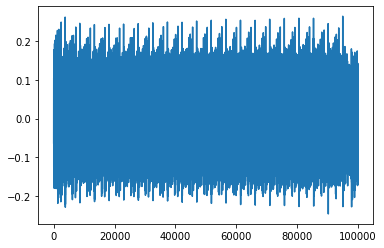

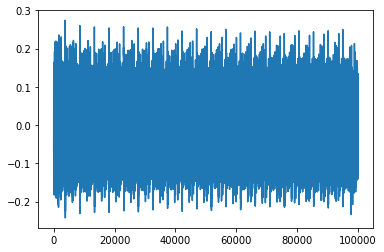

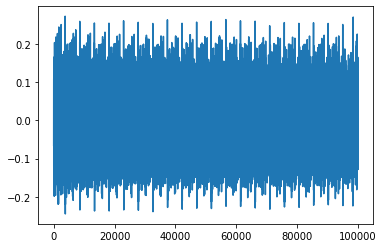

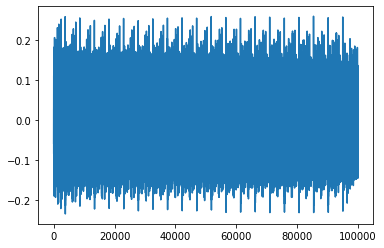

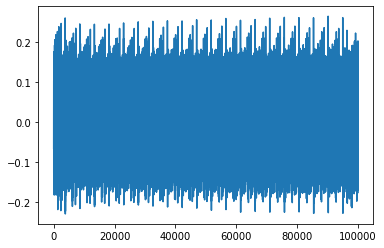

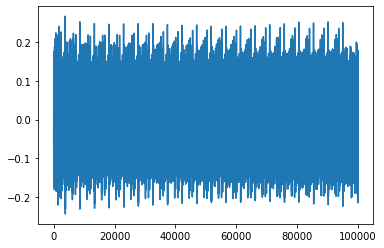

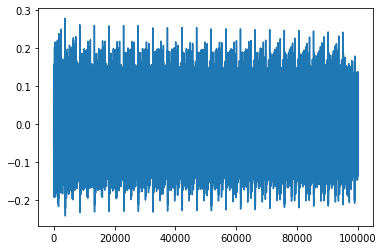

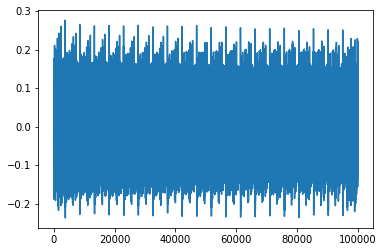

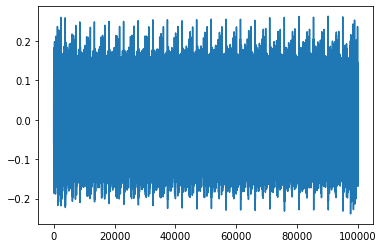

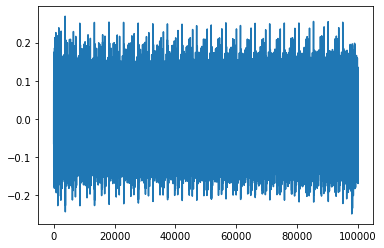

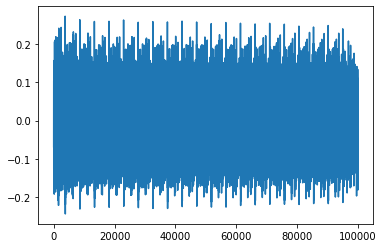

In [270]:
#y = audioDataFromFile('Wav_Files/recording_thisworks.wav')
#y = audioDataFromFile('Wav_Files/recording3.wav')
#y = audioDataFromFile('Wav_Files/reallylong_recording.wav')

y = y_next
#num_of_frames -=1

y = audioDataFromFile('Wav_Files/reallylong_recording2.wav')[48000*20:]

plot = False

data_index_length = frame_data_length * (N+CP)
CE_index_length = CE_repeat * (N+CP)

freq_data = []
# big loop to find out everything
for i in range(num_of_frames):
    # obtain only the time series we are interested in 
    y_data = removeChirpAndPause_std(y, chirp_signal, 600000, plot = False, rng = 100)
    
    plot_y(y_data[:100000], f=i)
    # Slice the data to retrieve the CE
    CE_samples, CE_freq, remaining = sliceData(y_data, CP-guard, N, CP, CE_repeat)
    CE_samples_end, CE_freq_end, remaining_end \
                    = sliceData(y_data[data_index_length + CE_index_length:], CP-guard, N, CP, CE_repeat)
    
    
    # Examine any phase shift 
    impulse_front, TF_front = getTF_FreqAverage(CE_freq, known_freq, N, CE_repeat)
    impulse_end, TF_end = getTF_FreqAverage(CE_freq_end, known_freq, N, CE_repeat)


    start_index = 0
    end_index = start_index + 2048
    TF_front_relevant =TF_front[start_index:end_index]
    TF_end_relevant = TF_end[start_index:end_index]
    
    
    angle_front = np.unwrap(np.angle(TF_front_relevant))
    angle_end = np.unwrap(np.angle(TF_end_relevant))

    difference = []
    for p, val in enumerate(angle_end):
        difference.append(round(val - angle_front[p], 3))
    
    stable_phase_start = 400
    stable_phase_length = 400


    p = np.linspace(stable_phase_start,   stable_phase_start + stable_phase_length,   stable_phase_length)
    q = difference[stable_phase_start:   stable_phase_start + stable_phase_length  ]
    
    param = np.polyfit(p,q,1)
    print("param ", param)
    grad = param[0]

    sliced_data = sliceDataContent_std(TF_front, TF_end, remaining, CP-guard, N, CP, frame_data_length, grad, CE_repeat)
    if i == 0:
        freq_data = sliced_data
    else:
        freq_data = np.concatenate((freq_data, sliced_data))
    
    
    y = remaining_end
    
    if plot:  
        print(difference[:15])
        print(difference[-15:])

        plot_y(difference[stable_phase_start:stable_phase_length + stable_phase_start], f = i+100, title = i)
        plot_y(angle_front, f = i+80, title = i)
        plot_y(angle_end, f= i+80)

        plt.figure(1000+i)
        plt.yscale("log")
        plt.plot(abs(np.array(TF_front))[:2048])
        plt.plot(abs(np.array(TF_end))[:2048])
        plot_y(abs(np.array(TF_front))[:2048], f=i+2)


    
    print(abs(param[1]) % (2 * math.pi))
 

In [256]:
print(freq_data.shape)

(360, 2047)


(-2, 2)

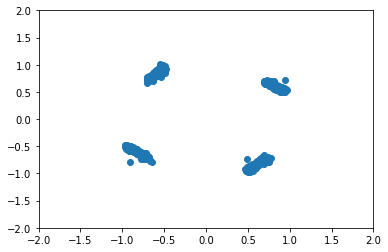

In [274]:
plot_res = np.array(freq_data[40])[100:1500]
plt.scatter(plot_res.real, plot_res.imag)
window = 2
plt.xlim(-1*window,window)
plt.ylim(-1*window, window)

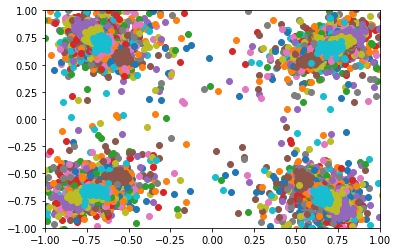

In [276]:
start = 180
duration = 360
for i in range(duration):
    plot_res = np.array(freq_data[start+i])[100:1500]
    plt.scatter(plot_res.real, plot_res.imag)
    window = 1
    plt.xlim(-1*window,window)
    plt.ylim(-1*window, window)

In [261]:
def demodVaryingModulation_std(constellation_array, instruct_list, N):
    inst_len = int(N/2 -1)
    assert inst_len == len(instruct_list), "instruction list length must match DFT length"
  
    binary_block = []
    
     # j = variable to iterate through the constellation symbols
    i = 0 #variable to iterate through the instructions symbols
    
    for j in range(len(constellation_array)):
            
        if instruct_list[i] == 1:
            binary_block.append(iqpsk(constellation_array[j:j+1]))
        
        elif instruct_list[i] == 2: 
            binary_block.append(iqam16(constellation_array[j:j+1]))
        
        elif instruct_list[i] == 3: 
            binary_block.append(ibpsk(constellation_array[j:j+1]))
        else:
            pass
        
        i += 1
        
        if i > inst_len-1:
            i = 0
    
    return "".join(binary_block) 


In [278]:
print(len(freq_data))
data1 = np.concatenate(tuple(freq_data))#[4*20:4*40]
predict = iHamming74(xor(demodVaryingModulation_std(data1, instruction, N), rand_for_xor))
#predict = iHamming74(demodVaryingModulation_std(data1, instruction, N))

#predict = iHamming74(iqpsk(data1))


2160


In [279]:
print(predict[-1000:])

0010000001110000011011110111001101110011011010010110001001101100011001010010111000100000010100110110111100100000011011000110111101101110011001110010000001100001011100110010000001101101011110010010000001110111011010010110011001100101001000000110100101110011001000000110000101101100011010010111011001100101001011000010000001001001001000000111011101100001011011100111010000100000011110010110111101110101001000000111010001101111001000000110101101100101011001010111000000100000011001010111011001100101011100100111100101110100011010000110100101101110011001110010000001001001001000000110100001100001011101100110010100100000011101000110111101101100011001000010000001111001011011110111010100100000011000010010000001110011011001010110001101110010011001010111010000101101001011010110010101110110011001010110111000100000011000010110011001110100011001010111001000100000010010010010000001101101011110010111001101100101011011000110011000100000011000010110110100100000011001000110010101100001011001000010111000100000

In [272]:
decoded = str_to_bytearray(predict).decode('utf-8', 'replace')
decoded

'Part 1: Sensei and I    I ALWAYS called him "Sensei." [note1] I shall therefore refer to him simply as "Sensei," and not by his real name. It is not because I consider it more discreet, but it is because I find it more natural that I do so. Whenever the memory of him comes back to me now, I find that I think of him as "Sensei" still. And with pen in hand, I cannot bring myself to write of him in any other way.  It was at Kamakura, during the summer holidays, that I first met Sensei. I was then a very young student. I went there at the insistence of a friend of mine, who had gone to Kamakura to swim. We were not together for long. It had taken me a few days to get together enough money to cover the necessary expenses, and it was only three days after my arrival that my friend received a telegram from home demanding his return. His mother, the telegram explained, was ill. My friend, however, did not believe this. For some time his parents had been trying to persuade him, much against hi

In [273]:
correct = 0
for i in range(len(predict)):
    if predict[i] == binary[i]:
        correct += 1
        
success_rate = correct / len(predict)
print(success_rate)

1.0


In [ ]:
'''text_file = open("Data_Files/decoded.txt", "w")
text_file.write(decoded)
text_file.close()'''